# Angle Time Plotter
This program is designed to plot and find the exact time corresponding to a given angle. The current version is a Jupyter project that contains all the necessary functions and example usage to run.

## Import Necessary Library (Base)

In [188]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import datetime
import numpy as np

## Main Function

In [189]:
def plot_clock(datetime_obj):
    """Plot clock at a given time"""
    # Get the current time
    hour = datetime_obj.hour
    minute = datetime_obj.minute
    second = datetime_obj.second
    microsecond = datetime_obj.microsecond

    # Calculate the angles for the hour and minute hands
    hour_angle = -(((hour % 12) * 30) + ((minute / 60) * 30) + ((second / 3600) * 30) + (microsecond / 3600000000) * 30)
    minute_angle = -(((minute / 60) * 360) + ((second / 3600) * 360) + ((microsecond / 3600000000) * 360))
    second_angle = -(((second / 60) * 360) + ((microsecond / 1000000) * 360))

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(5, 5))

    # Set the aspect ratio of the plot to equal
    ax.set_aspect('equal')

    # Create the clock face circle
    circle = patches.Circle((0.5, 0.5), radius=0.4, edgecolor='black', facecolor='white')
    ax.add_patch(circle)

    # Create the second hand
    second_hand_x = [0.5, 0.5 + 0.65 * 0.5 * -np.sin(np.radians(second_angle))]
    second_hand_y = [0.5, 0.5 + 0.7 * 0.5 * np.cos(np.radians(second_angle))]
    second_hand = plt.Line2D(second_hand_x, second_hand_y, linewidth=1, color='yellow')
    ax.add_line(second_hand)

    # Create the minute hand
    minute_hand_x = [0.5, 0.5 + 0.6 * 0.5 * -np.sin(np.radians(minute_angle))]
    minute_hand_y = [0.5, 0.5 + 0.6 * 0.5 * np.cos(np.radians(minute_angle))]
    minute_hand = plt.Line2D(minute_hand_x, minute_hand_y, linewidth=2, color='red')
    ax.add_line(minute_hand)

    # Create the hour hand
    hour_hand_x = [0.5, 0.5 + 0.55 * 0.5 * -np.sin(np.radians(hour_angle))]
    hour_hand_y = [0.5, 0.5 + 0.55 * 0.5 * np.cos(np.radians(hour_angle))]
    hour_hand = plt.Line2D(hour_hand_x, hour_hand_y, linewidth=4, color='blue')
    ax.add_line(hour_hand)

    # Add numbers to the clock face
    for i in range(1, 13):
        angle = np.radians(30 * i)
        x = 0.5 + 0.35 * np.sin(angle)
        y = 0.5 + 0.35 * np.cos(angle)
        ax.text(x, y, str(i), fontsize=12, ha='center', va='center')

        # Add numbers to the clock face
    for i in range(1, 61):
        angle = np.radians(6 * i)
        x = 0.5 + 0.31 * np.sin(angle)
        y = 0.5 + 0.31 * np.cos(angle)
        ax.text(x, y, str(i), fontsize=5.5, ha='center', va='center')

    # Set the axis limits and remove ticks
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])

    # Show the plot
    print(f"Time: {datetime_obj}" )
    plt.show()



def convert_datetime_microsec(datetime_time):
  """Convert from datetime.time to microsecond"""
  result = datetime_time.microsecond
  result = result + 1000000*datetime_time.second
  result = result + 60*1000000*datetime_time.minute
  result = result + 60*60*1000000*datetime_time.hour
  return result


def convert_microsec_datetime(microsecond):
  """Convert from microsecond to datetime object"""
  hour = microsecond // 3600000000
  remainder_hour = microsecond % 3600000000

  minute = remainder_hour // 60000000
  remainder_minute = remainder_hour % 60000000

  second = remainder_minute // 1000000
  microsecond = remainder_minute % 1000000

  return datetime.time(hour,minute,second,microsecond)


def calculate_hour_hand_angle(datetime_time):
  """Calculate the angle of hour hand relative to 00:00:00"""
  HOUR2MICROSECOND = 43200000000
  HOUR_HAND_ANGLE_MOVEMENT = 360/HOUR2MICROSECOND
  microsecond_time = convert_datetime_microsec(datetime_time)
  remainder_time = microsecond_time % HOUR2MICROSECOND
  return (HOUR_HAND_ANGLE_MOVEMENT * remainder_time)


def calculate_minute_hand_angle(datetime_time):
  """Calculate the angle of minute hand relative to 00:00:00"""
  MINUTE2MICROSECOND = 3600000000
  MINUTE_HAND_ANGLE_MOVEMENT = 360/MINUTE2MICROSECOND
  microsecond_time = convert_datetime_microsec(datetime_time)
  remainder_time = microsecond_time % MINUTE2MICROSECOND
  return (MINUTE_HAND_ANGLE_MOVEMENT * remainder_time)


def calculate_hour_minute_hand_angle(datetime_time, negative_degree = False):
  """Calculate the angle of hour hand and minute hand given datetime object"""
  the_hour_hand_angle = calculate_hour_hand_angle(datetime_time)
  the_minute_hand_angle = calculate_minute_hand_angle(datetime_time)

  minute_minus_hour = the_minute_hand_angle - the_hour_hand_angle

  if negative_degree:
    return minute_minus_hour

  minute_degree_bigger = the_minute_hand_angle > the_hour_hand_angle
  return minute_minus_hour if minute_degree_bigger else (0 - minute_minus_hour)


def calculate_hour_minute_hand_angle_by_microsec(microsecond, negative_degree = True):
  """Calculate the angle of hour hand and minute hand given microsecond"""
  time_clock_array = convert_microsec_datetime(microsecond)
  hour_minute_angle = calculate_hour_minute_hand_angle(time_clock_array,
                                                       negative_degree = True)

  return hour_minute_angle


def calculate_midpoint_datetime(tc_upper, tc_lower):
  """Calculate the midpoint of two datetime object"""
  upper_bound_m = convert_datetime_microsec(tc_upper)
  lower_bound_m = convert_datetime_microsec(tc_lower)

  middle_point_m = int(round(((upper_bound_m + lower_bound_m) / 2)))
  middle_point_tc = convert_microsec_datetime(middle_point_m)
  return middle_point_tc


def calculate_finite_difference_derivative(functions, x, step=1):
  """Calculate the derivative of a function with certain input x by approximation of finite difference"""
  derivative = (functions(x + step) - functions(x)) / step
  return derivative


def find_datetime_by_exact_degree_bisection_method(exact_angle, tc_lower, tc_upper, iter_max = 100, verbose = False):
  """find datetime given exact degree of hour minute hand and time_range (tc_lower and tc_upper)"""

  upper_bound_m = convert_datetime_microsec(tc_upper)
  lower_bound_m = convert_datetime_microsec(tc_lower)

  upper_bound_tc = tc_upper
  lower_bound_tc = tc_lower
  midpoint_bound_tc =  calculate_midpoint_datetime(upper_bound_tc, lower_bound_tc)

  for i in range(iter_max):
    angle_ub = calculate_hour_minute_hand_angle(upper_bound_tc, negative_degree = True)
    angle_lb = calculate_hour_minute_hand_angle(lower_bound_tc, negative_degree = True)
    angle_mb = calculate_hour_minute_hand_angle(midpoint_bound_tc, negative_degree = True)

    result = (f"iter:{i} ub_tc: {upper_bound_tc} with angle: {angle_ub}, "
              f"lb_tc: {lower_bound_tc} with angle: {angle_lb}, "
              f"mb_tc: {midpoint_bound_tc} with angle: {angle_mb}, "
              f"improv: {angle_mb - angle_lb}.")

    if verbose:
      print(result)

    if angle_lb == exact_angle:
      return lower_bound_tc

    elif angle_ub == exact_angle:
      return upper_bound_tc

    elif angle_mb == exact_angle:
      return midpoint_bound_tc

    elif (upper_bound_tc == midpoint_bound_tc) or (lower_bound_tc == midpoint_bound_tc):
      return upper_bound_tc if abs(angle_ub - exact_angle) < abs(angle_lb - exact_angle) else lower_bound_tc

    elif (angle_lb < exact_angle < angle_mb):
      upper_bound_tc = midpoint_bound_tc
      midpoint_bound_tc = calculate_midpoint_datetime(upper_bound_tc, lower_bound_tc)

    elif (angle_mb < exact_angle < angle_ub):
      lower_bound_tc = midpoint_bound_tc
      midpoint_bound_tc = calculate_midpoint_datetime(upper_bound_tc, lower_bound_tc)

  return result


def find_datetime_by_exact_degree_newton_raphson_method(exact_angle, tc_init, epsilon=1e-6, iter_max=100, verbose = False):
  """Finds datetime with given exact degree and initial time (tc_init)"""
  approximation = convert_datetime_microsec(tc_init) # Initial guess

  for i in range(iter_max):
    function_value = calculate_hour_minute_hand_angle_by_microsec(approximation) - exact_angle
    derivative_value = calculate_finite_difference_derivative(calculate_hour_minute_hand_angle_by_microsec, approximation)

    if verbose:
      print(f'iteration: {i}')
      print(f'pre-approximation: {approximation}')
      print(f'function_value: {function_value}')
      print(f'derivative_value: {derivative_value}')

    approximation -= int(function_value / derivative_value)
    #print(int(function_value / derivative_value))

    if verbose:
      print(f'post-approximation: {approximation}')
      print()

    if abs(function_value) < epsilon:
        break


    if approximation < 0 or (approximation > convert_datetime_microsec(datetime.time(12,0,0,0))):
      result = "Such clock configuration does not exist"
      return result

  result = convert_microsec_datetime(approximation)
  return result


def find_datetime_by_exact_degree(exact_angle, tc_init, tc_upper = None, iter_max = 100, verbose = False, method= "bisection"):
  upper_bound = tc_upper
  lower_bound = tc_init
  result = None

  if tc_upper == None:
    upper_bound = lower_bound

  if method == "bisection":
    result = find_datetime_by_exact_degree_bisection_method(exact_angle, tc_init, tc_upper, iter_max = iter_max, verbose = verbose)
  elif method == "newton_raphson":
    result = find_datetime_by_exact_degree_newton_raphson_method(exact_angle, tc_init, iter_max = iter_max, verbose = verbose)
  else:
    raise ValueError(f"Invalid method. Supported methods are 'bisection' and 'newton_raphson'. Your input was '{method}' ")

  if verbose:
    print()
    print(f"Exact Angle: {exact_angle}")
    print(f"TC init: {tc_init}")
    print(f"TC Upper: {tc_upper}")
    print(f"Method: {method}")

  return result


### Functional Test (Keep hidden if not in development)

Time: 10:10:10.000010


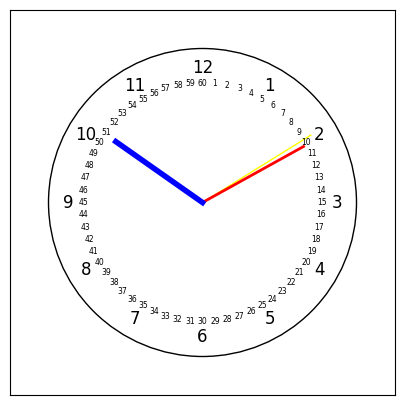

In [190]:
def test_plot_clock():
  """ Testing plot_clock() function """
  time_clock = datetime.time(10,10,10,10)
  plot_clock(time_clock)



test_plot_clock()

In [191]:
def test_convert_datetime_microsec():
  time_clock = datetime.time(2, 40, 50, 0)
  m = convert_datetime_microsec(time_clock)
  print(m)


def test_convert_microsec_datetime():
  time_clock = datetime.time(2, 40, 50, 0)
  m = convert_datetime_microsec(time_clock)
  tc = convert_microsec_datetime(m)
  print(tc)



test_convert_datetime_microsec()
print()
test_convert_microsec_datetime()

9650000000

02:40:50


In [192]:
def test_calculate_hour_hand_angle():
  time_clock = datetime.time(10,20,3,0)
  result = calculate_hour_hand_angle(time_clock)
  print(result)


def test_calculate_minute_hand_angle():
  time_clock = datetime.time(10,20,3,0)
  result = calculate_hour_hand_angle(time_clock)
  print(result)


def test_calculate_hour_minute_hand_angle():
  time_clock = datetime.time(10,20,3,0)
  result = calculate_hour_minute_hand_angle(time_clock, negative_degree = True)
  result_absolute = calculate_hour_minute_hand_angle(time_clock,
                                                     negative_degree = False)
  print(result, result_absolute)

def test_calculate_hour_minute_hand_angle_by_microsec():
  time_clock = datetime.time(10,20,3,0)
  microsec = convert_datetime_microsec(time_clock)
  result = calculate_hour_minute_hand_angle_by_microsec(microsec,
                                                        negative_degree = True)
  result_absolute = calculate_hour_minute_hand_angle_by_microsec(microsec,
                                                     negative_degree = False)
  print(result, result_absolute)



test_calculate_hour_hand_angle()
print()
test_calculate_minute_hand_angle()
print()
test_calculate_hour_minute_hand_angle()
print()
test_calculate_hour_minute_hand_angle_by_microsec()

310.02500000000003

310.02500000000003

-189.72500000000002 189.72500000000002

-189.72500000000002 -189.72500000000002


In [193]:
def test_calculate_midpoint_datetime():
  time_clock_u = datetime.time(6,33,0,10)
  time_clock_l = datetime.time(6,33,0,0)
  result = calculate_midpoint_datetime(time_clock_u, time_clock_l)
  print(result)



test_calculate_midpoint_datetime()

06:33:00.000005


In [194]:
def test_find_datetime_by_exact_degree_bisection_method():
  result = find_datetime_by_exact_degree_bisection_method(exact_angle=90,
                                                          tc_lower = datetime.time(5,0,0,0),
                                                          tc_upper = datetime.time(5,59,59,999),
                                                          verbose = True)
  print(result)


def test_find_datetime_by_exact_degree_newton_raphson_method():
  result = find_datetime_by_exact_degree_newton_raphson_method(exact_angle = 90,
                                                               tc_init = datetime.time(5,59,59,999),
                                                               verbose = True)
  print(result)


def test_find_datetime_by_exact_degree():
  result1 = find_datetime_by_exact_degree(exact_angle = 90,
                                         tc_init = datetime.time(5,0,0,0),
                                         tc_upper = datetime.time(5,59,59,999),
                                         verbose = True)

  print()

  result2 = find_datetime_by_exact_degree(exact_angle = 90,
                                         tc_init = datetime.time(5,0,0,0),
                                         tc_upper = datetime.time(5,59,59,999),
                                         method = "bisection",
                                         verbose = True)

  print()
  print(result1)
  print()
  print(result2)



test_find_datetime_by_exact_degree_bisection_method()
print()
test_find_datetime_by_exact_degree_newton_raphson_method()
print()
test_find_datetime_by_exact_degree()

iter:0 ub_tc: 05:59:59.000999 with angle: 179.9084249083333, lb_tc: 05:00:00 with angle: -150.0, mb_tc: 05:29:59.500500 with angle: 14.954212500000011, improv: 164.9542125.
iter:1 ub_tc: 05:59:59.000999 with angle: 179.9084249083333, lb_tc: 05:29:59.500500 with angle: 14.954212500000011, mb_tc: 05:44:59.250750 with angle: 97.43131875, improv: 82.47710624999999.
iter:2 ub_tc: 05:44:59.250750 with angle: 97.43131875, lb_tc: 05:29:59.500500 with angle: 14.954212500000011, mb_tc: 05:37:29.375625 with angle: 56.19276562499999, improv: 41.23855312499998.
iter:3 ub_tc: 05:44:59.250750 with angle: 97.43131875, lb_tc: 05:37:29.375625 with angle: 56.19276562499999, mb_tc: 05:41:14.313188 with angle: 76.8120422333333, improv: 20.61927660833331.
iter:4 ub_tc: 05:44:59.250750 with angle: 97.43131875, lb_tc: 05:41:14.313188 with angle: 76.8120422333333, mb_tc: 05:43:06.781969 with angle: 87.12168049166667, improv: 10.309638258333365.
iter:5 ub_tc: 05:44:59.250750 with angle: 97.43131875, lb_tc: 05:4

## Example Usage

### 1. Plotting a Clock

Time: 05:30:00


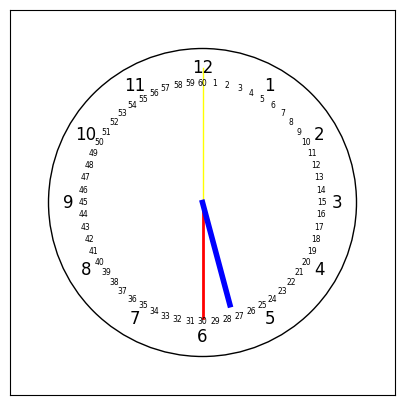

In [195]:
plot_clock(datetime.time(5,30,0,0))

### 2. Converting Datetime.time Object to Microsecond and Vice Versa

#### 2.1 Convert Datetime to Microsecond

In [196]:
convert_datetime_microsec(datetime.time(5,30,0,0))

19800000000

#### 2.2 Convert Microsecond to Datetime

In [197]:
convert_microsec_datetime(19800000000)

datetime.time(5, 30)

### 3. Calculating Hour and Minute Hand Angle

In [198]:
time_clock = datetime.time(5,30,0,0)
result = calculate_hour_minute_hand_angle(time_clock, negative_degree = True)
result_absolute = calculate_hour_minute_hand_angle(time_clock, negative_degree = False)
print(result, result_absolute)

15.0 15.0


###4. Calculating Time Based on Angle

In [199]:
find_datetime_by_exact_degree(80, datetime.time(5,0,0,0), datetime.time(5,59,59,999))

datetime.time(5, 41, 49, 90909)



Hour: 0
0 -45
newton_raphson
Such clock configuration does not exist
Not Exist

bisection
iter:99 ub_tc: 00:59:59.000999 with angle: 329.9084249083333, lb_tc: 00:00:00 with angle: 0.0, mb_tc: 00:29:59.500500 with angle: 164.9542125, improv: 164.9542125.
Not Exist

0 45
newton_raphson
00:08:10.909090
Time: 00:08:10.909090


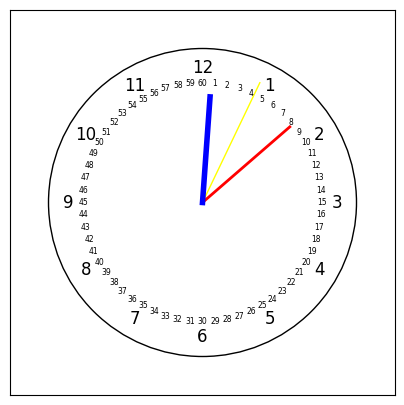


bisection
00:08:10.909091
Time: 00:08:10.909091


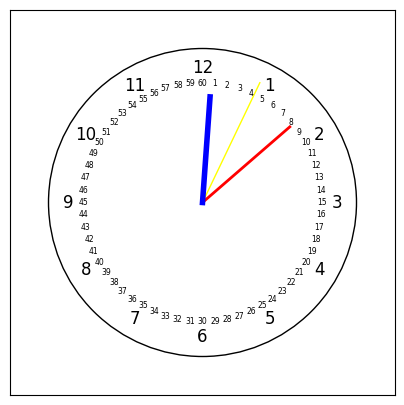


0 -315
newton_raphson
Such clock configuration does not exist
Not Exist

bisection
iter:99 ub_tc: 00:59:59.000999 with angle: 329.9084249083333, lb_tc: 00:00:00 with angle: 0.0, mb_tc: 00:29:59.500500 with angle: 164.9542125, improv: 164.9542125.
Not Exist

0 315
newton_raphson
00:57:16.363636
Time: 00:57:16.363636


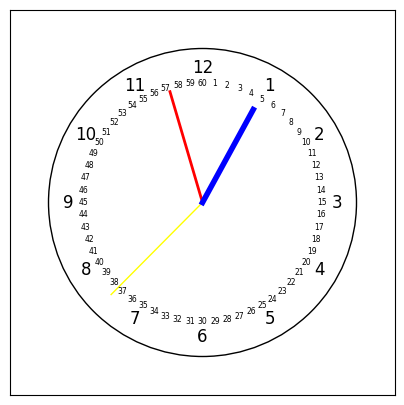


bisection
00:57:16.363636
Time: 00:57:16.363636


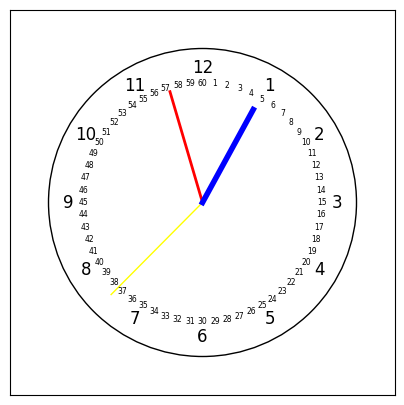




Hour: 1
1 -45
newton_raphson
Such clock configuration does not exist
Not Exist

bisection
iter:99 ub_tc: 01:59:59.000999 with angle: 299.9084249083333, lb_tc: 01:00:00 with angle: -30.0, mb_tc: 01:29:59.500500 with angle: 134.9542125, improv: 164.9542125.
Not Exist

1 45
newton_raphson
01:13:38.181818
Time: 01:13:38.181818


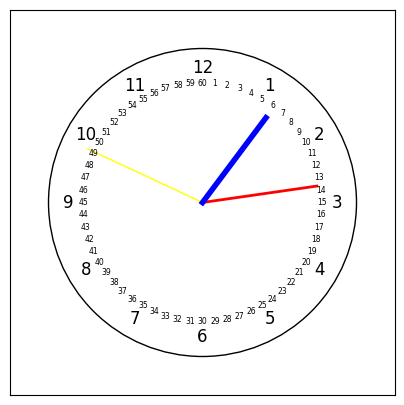


bisection
01:13:38.181818
Time: 01:13:38.181818


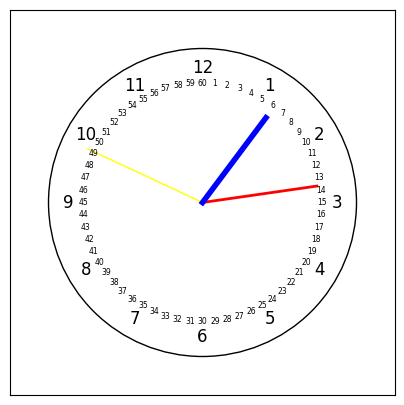


1 -315
newton_raphson
Such clock configuration does not exist
Not Exist

bisection
iter:99 ub_tc: 01:59:59.000999 with angle: 299.9084249083333, lb_tc: 01:00:00 with angle: -30.0, mb_tc: 01:29:59.500500 with angle: 134.9542125, improv: 164.9542125.
Not Exist

1 315
newton_raphson
Such clock configuration does not exist
Not Exist

bisection
iter:99 ub_tc: 01:59:59.000999 with angle: 299.9084249083333, lb_tc: 01:00:00 with angle: -30.0, mb_tc: 01:29:59.500500 with angle: 134.9542125, improv: 164.9542125.
Not Exist



Hour: 2
2 -45
newton_raphson
02:02:43.636364
Time: 02:02:43.636364


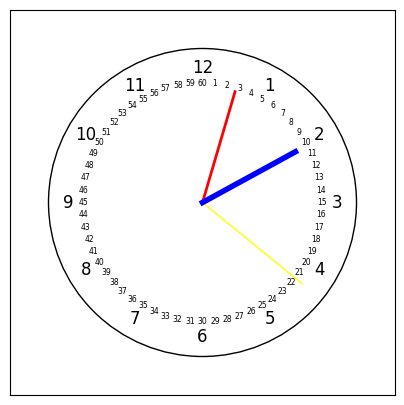


bisection
02:02:43.636364
Time: 02:02:43.636364


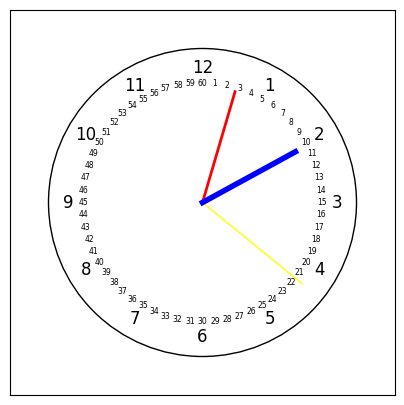


2 45
newton_raphson
02:19:05.454546
Time: 02:19:05.454546


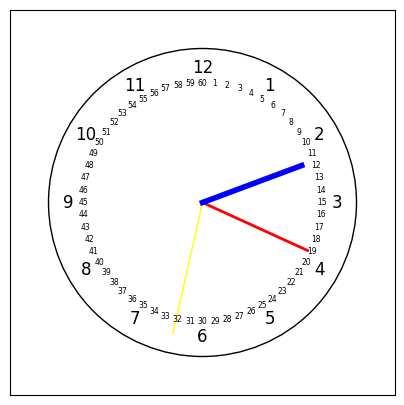


bisection
02:19:05.454545
Time: 02:19:05.454545


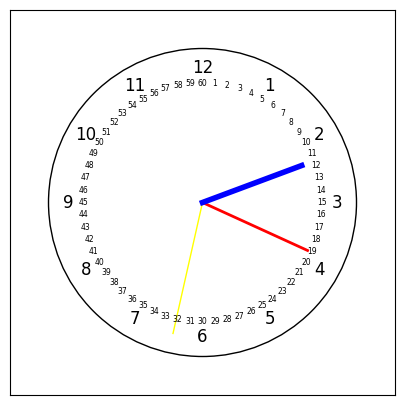


2 -315
newton_raphson
Such clock configuration does not exist
Not Exist

bisection
iter:99 ub_tc: 02:59:59.000999 with angle: 269.9084249083333, lb_tc: 02:00:00 with angle: -60.0, mb_tc: 02:29:59.500500 with angle: 104.9542125, improv: 164.95421249999998.
Not Exist

2 315
newton_raphson
Such clock configuration does not exist
Not Exist

bisection
iter:99 ub_tc: 02:59:59.000999 with angle: 269.9084249083333, lb_tc: 02:00:00 with angle: -60.0, mb_tc: 02:29:59.500500 with angle: 104.9542125, improv: 164.95421249999998.
Not Exist



Hour: 3
3 -45
newton_raphson
03:08:10.909091
Time: 03:08:10.909091


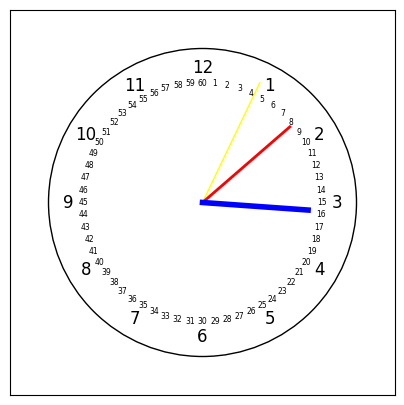


bisection
03:08:10.909091
Time: 03:08:10.909091


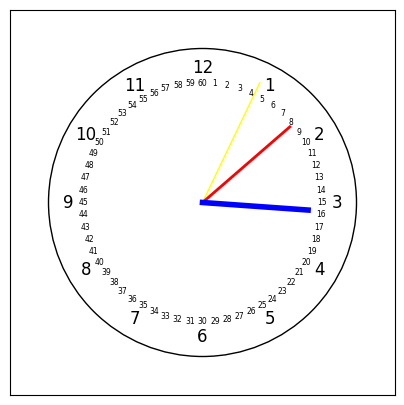


3 45
newton_raphson
03:24:32.727273
Time: 03:24:32.727273


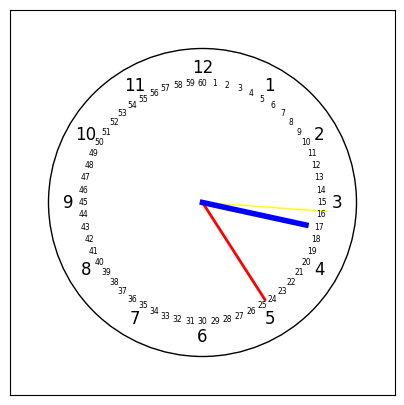


bisection
03:24:32.727273
Time: 03:24:32.727273


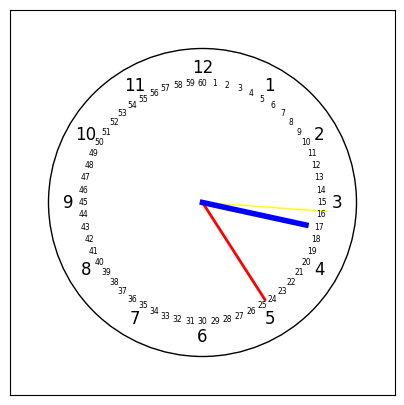


3 -315
newton_raphson
Such clock configuration does not exist
Not Exist

bisection
iter:99 ub_tc: 03:59:59.000999 with angle: 239.9084249083333, lb_tc: 03:00:00 with angle: -90.0, mb_tc: 03:29:59.500500 with angle: 74.9542125, improv: 164.95421249999998.
Not Exist

3 315
newton_raphson
Such clock configuration does not exist
Not Exist

bisection
iter:99 ub_tc: 03:59:59.000999 with angle: 239.9084249083333, lb_tc: 03:00:00 with angle: -90.0, mb_tc: 03:29:59.500500 with angle: 74.9542125, improv: 164.95421249999998.
Not Exist



Hour: 4
4 -45
newton_raphson
04:13:38.181819
Time: 04:13:38.181819


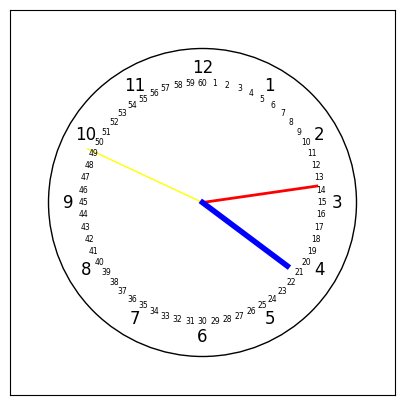


bisection
04:13:38.181818
Time: 04:13:38.181818


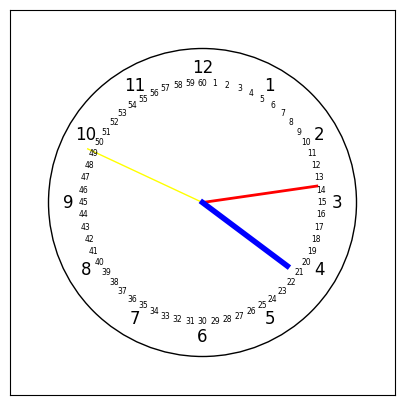


4 45
newton_raphson
04:30:00
Time: 04:30:00


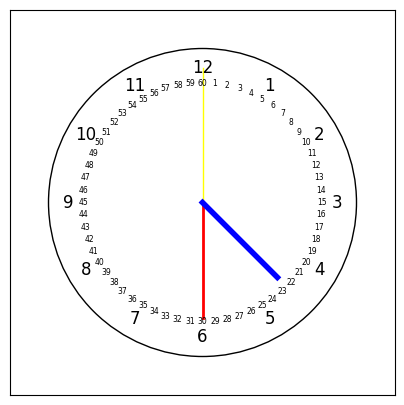


bisection
04:30:00
Time: 04:30:00


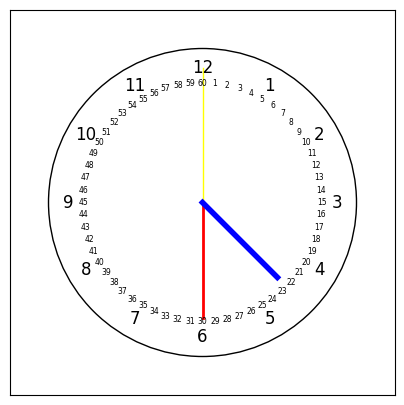


4 -315
newton_raphson
Such clock configuration does not exist
Not Exist

bisection
iter:99 ub_tc: 04:59:59.000999 with angle: 209.90842490833333, lb_tc: 04:00:00 with angle: -120.0, mb_tc: 04:29:59.500500 with angle: 44.95421250000001, improv: 164.9542125.
Not Exist

4 315
newton_raphson
Such clock configuration does not exist
Not Exist

bisection
iter:99 ub_tc: 04:59:59.000999 with angle: 209.90842490833333, lb_tc: 04:00:00 with angle: -120.0, mb_tc: 04:29:59.500500 with angle: 44.95421250000001, improv: 164.9542125.
Not Exist



Hour: 5
5 -45
newton_raphson
05:19:05.454546
Time: 05:19:05.454546


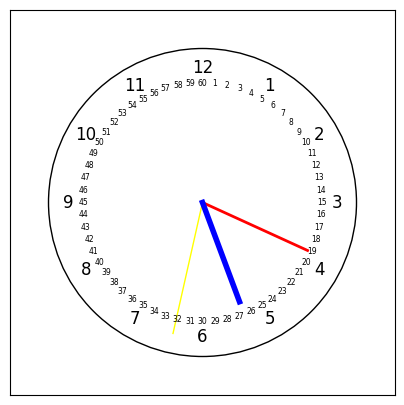


bisection
05:19:05.454545
Time: 05:19:05.454545


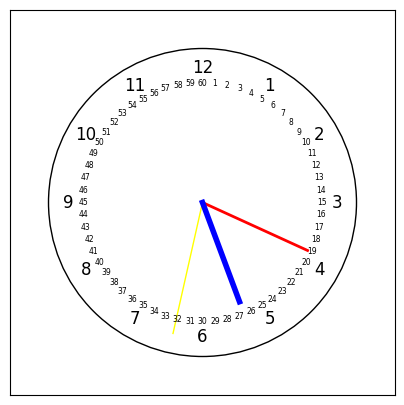


5 45
newton_raphson
05:35:27.272728
Time: 05:35:27.272728


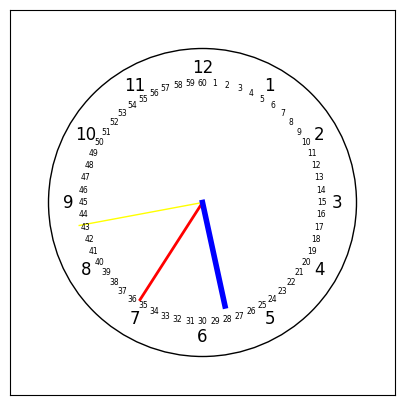


bisection
05:35:27.272727
Time: 05:35:27.272727


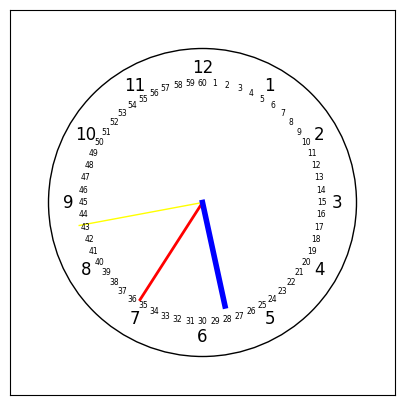


5 -315
newton_raphson
Such clock configuration does not exist
Not Exist

bisection
iter:99 ub_tc: 05:59:59.000999 with angle: 179.9084249083333, lb_tc: 05:00:00 with angle: -150.0, mb_tc: 05:29:59.500500 with angle: 14.954212500000011, improv: 164.9542125.
Not Exist

5 315
newton_raphson
Such clock configuration does not exist
Not Exist

bisection
iter:99 ub_tc: 05:59:59.000999 with angle: 179.9084249083333, lb_tc: 05:00:00 with angle: -150.0, mb_tc: 05:29:59.500500 with angle: 14.954212500000011, improv: 164.9542125.
Not Exist



Hour: 6
6 -45
newton_raphson
06:24:32.727273
Time: 06:24:32.727273


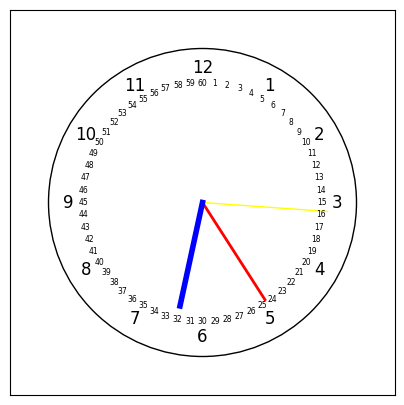


bisection
06:24:32.727273
Time: 06:24:32.727273


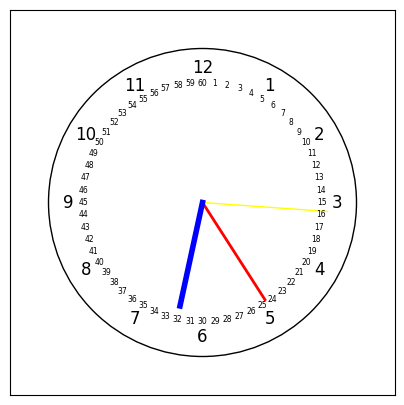


6 45
newton_raphson
06:40:54.545455
Time: 06:40:54.545455


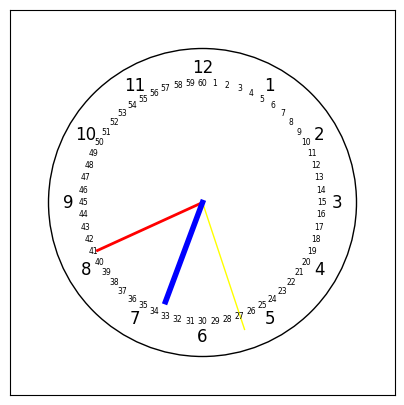


bisection
06:40:54.545455
Time: 06:40:54.545455


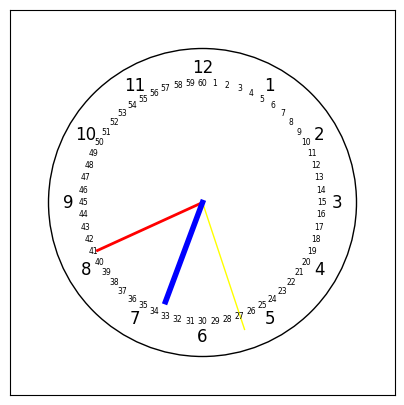


6 -315
newton_raphson
Such clock configuration does not exist
Not Exist

bisection
iter:99 ub_tc: 06:59:59.000999 with angle: 149.9084249083333, lb_tc: 06:00:00 with angle: -180.0, mb_tc: 06:29:59.500500 with angle: -15.045787499999989, improv: 164.9542125.
Not Exist

6 315
newton_raphson
Such clock configuration does not exist
Not Exist

bisection
iter:99 ub_tc: 06:59:59.000999 with angle: 149.9084249083333, lb_tc: 06:00:00 with angle: -180.0, mb_tc: 06:29:59.500500 with angle: -15.045787499999989, improv: 164.9542125.
Not Exist



Hour: 7
7 -45
newton_raphson
07:30:00
Time: 07:30:00


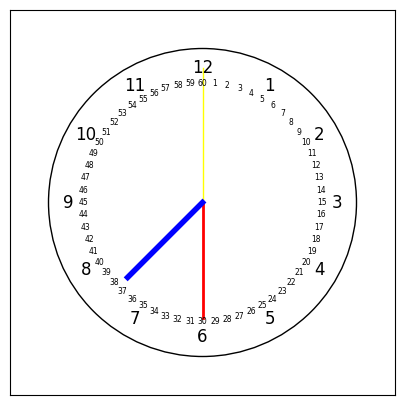


bisection
07:30:00
Time: 07:30:00


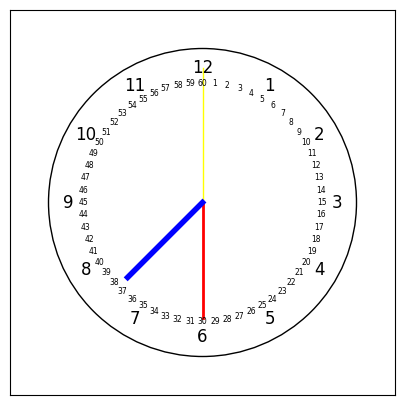


7 45
newton_raphson
07:46:21.818182
Time: 07:46:21.818182


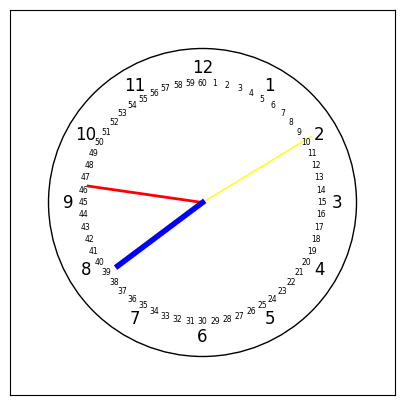


bisection
07:46:21.818182
Time: 07:46:21.818182


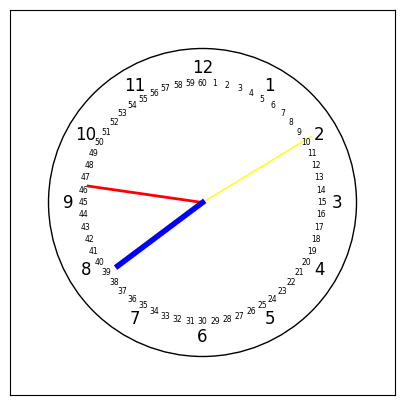


7 -315
newton_raphson
Such clock configuration does not exist
Not Exist

bisection
iter:99 ub_tc: 07:59:59.000999 with angle: 119.9084249083333, lb_tc: 07:00:00 with angle: -210.0, mb_tc: 07:29:59.500500 with angle: -45.04578749999999, improv: 164.9542125.
Not Exist

7 315
newton_raphson
Such clock configuration does not exist
Not Exist

bisection
iter:99 ub_tc: 07:59:59.000999 with angle: 119.9084249083333, lb_tc: 07:00:00 with angle: -210.0, mb_tc: 07:29:59.500500 with angle: -45.04578749999999, improv: 164.9542125.
Not Exist



Hour: 8
8 -45
newton_raphson
08:35:27.272728
Time: 08:35:27.272728


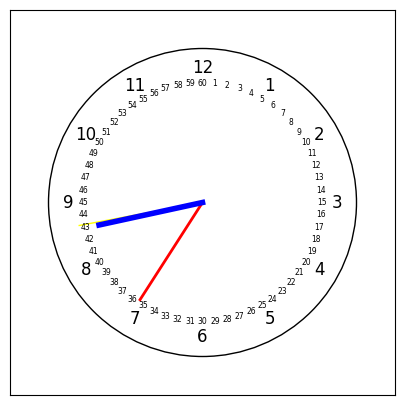


bisection
08:35:27.272727
Time: 08:35:27.272727


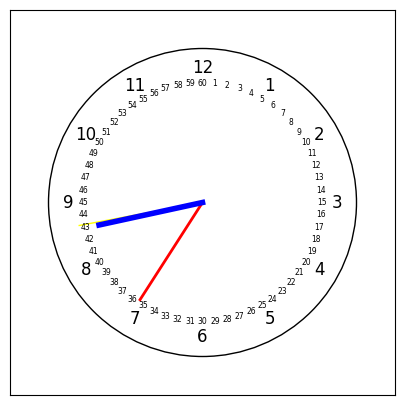


8 45
newton_raphson
08:51:49.090910
Time: 08:51:49.090910


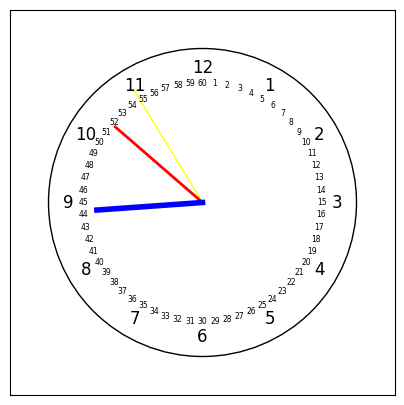


bisection
08:51:49.090909
Time: 08:51:49.090909


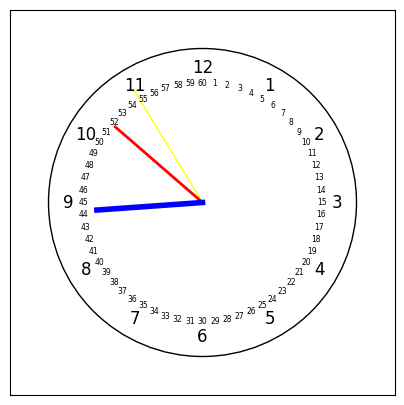


8 -315
newton_raphson
Such clock configuration does not exist
Not Exist

bisection
iter:99 ub_tc: 08:59:59.000999 with angle: 89.9084249083333, lb_tc: 08:00:00 with angle: -240.0, mb_tc: 08:29:59.500500 with angle: -75.04578749999999, improv: 164.9542125.
Not Exist

8 315
newton_raphson
Such clock configuration does not exist
Not Exist

bisection
iter:99 ub_tc: 08:59:59.000999 with angle: 89.9084249083333, lb_tc: 08:00:00 with angle: -240.0, mb_tc: 08:29:59.500500 with angle: -75.04578749999999, improv: 164.9542125.
Not Exist



Hour: 9
9 -45
newton_raphson
09:40:54.545455
Time: 09:40:54.545455


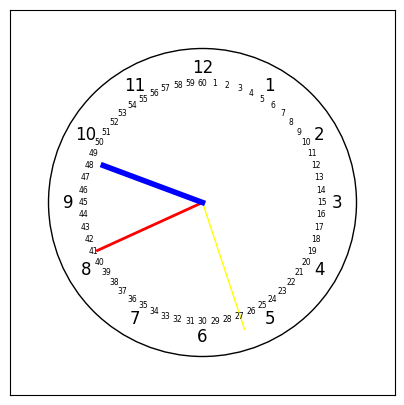


bisection
09:40:54.545455
Time: 09:40:54.545455


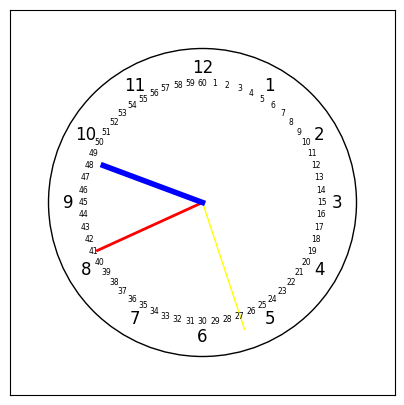


9 45
newton_raphson
09:57:16.363637
Time: 09:57:16.363637


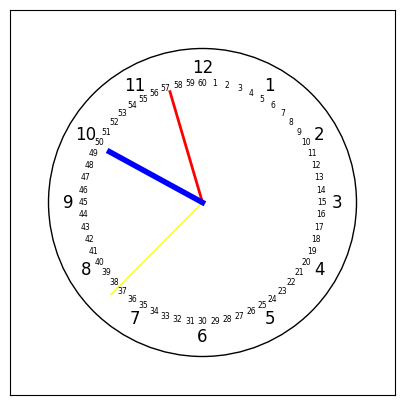


bisection
09:57:16.363636
Time: 09:57:16.363636


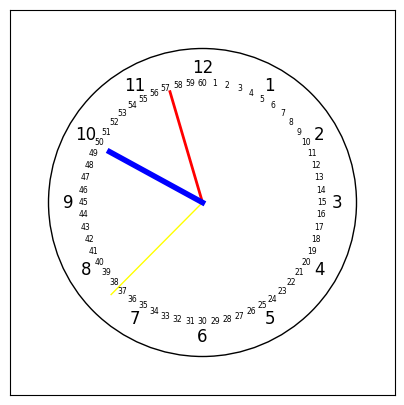


9 -315
newton_raphson
Such clock configuration does not exist
Not Exist

bisection
iter:99 ub_tc: 09:59:59.000999 with angle: 59.9084249083333, lb_tc: 09:00:00 with angle: -270.0, mb_tc: 09:29:59.500500 with angle: -105.04578749999999, improv: 164.9542125.
Not Exist

9 315
newton_raphson
Such clock configuration does not exist
Not Exist

bisection
iter:99 ub_tc: 09:59:59.000999 with angle: 59.9084249083333, lb_tc: 09:00:00 with angle: -270.0, mb_tc: 09:29:59.500500 with angle: -105.04578749999999, improv: 164.9542125.
Not Exist



Hour: 10
10 -45
newton_raphson
10:46:21.818182
Time: 10:46:21.818182


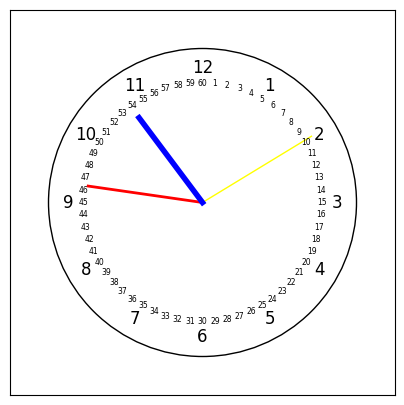


bisection
10:46:21.818182
Time: 10:46:21.818182


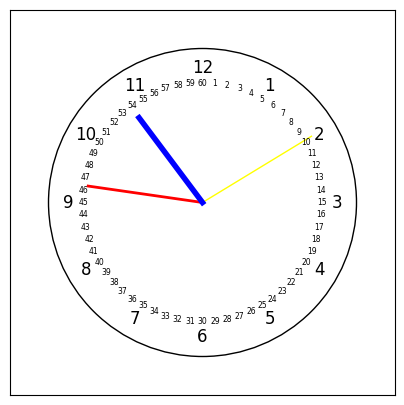


10 45
newton_raphson
Such clock configuration does not exist
Not Exist

bisection
iter:99 ub_tc: 10:59:59.000999 with angle: 29.908424908333302, lb_tc: 10:00:00 with angle: -300.0, mb_tc: 10:29:59.500500 with angle: -135.0457875, improv: 164.9542125.
Not Exist

10 -315
newton_raphson
Such clock configuration does not exist
Not Exist

bisection
iter:99 ub_tc: 10:59:59.000999 with angle: 29.908424908333302, lb_tc: 10:00:00 with angle: -300.0, mb_tc: 10:29:59.500500 with angle: -135.0457875, improv: 164.9542125.
Not Exist

10 315
newton_raphson
Such clock configuration does not exist
Not Exist

bisection
iter:99 ub_tc: 10:59:59.000999 with angle: 29.908424908333302, lb_tc: 10:00:00 with angle: -300.0, mb_tc: 10:29:59.500500 with angle: -135.0457875, improv: 164.9542125.
Not Exist



Hour: 11
11 -45
newton_raphson
11:51:49.090910
Time: 11:51:49.090910


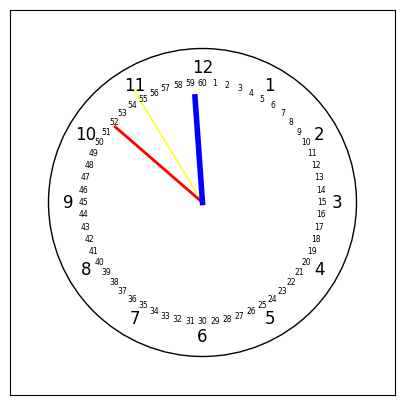


bisection
11:51:49.090909
Time: 11:51:49.090909


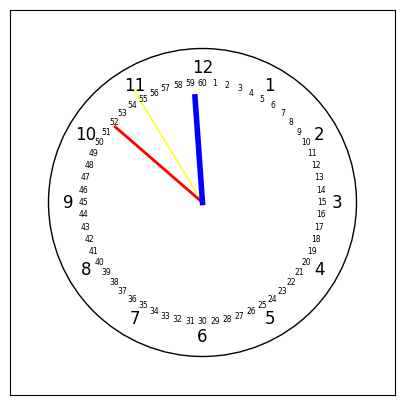


11 45
newton_raphson
Such clock configuration does not exist
Not Exist

bisection
iter:99 ub_tc: 11:59:59.000999 with angle: -0.09157509166669797, lb_tc: 11:00:00 with angle: -330.0, mb_tc: 11:29:59.500500 with angle: -165.0457875, improv: 164.9542125.
Not Exist

11 -315
newton_raphson
11:02:43.636364
Time: 11:02:43.636364


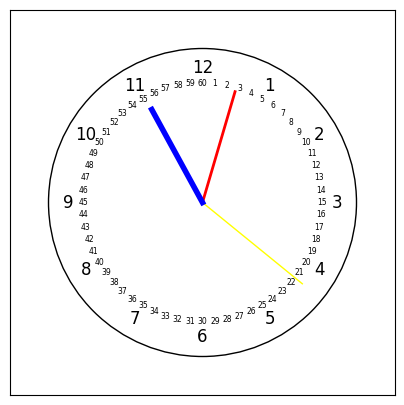


bisection
11:02:43.636364
Time: 11:02:43.636364


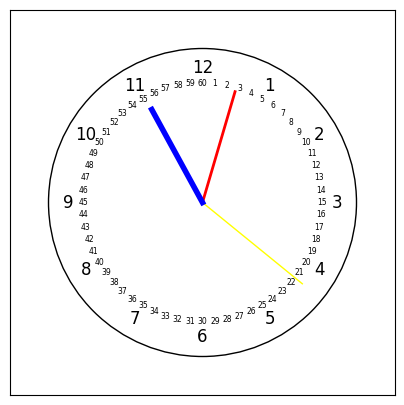


11 315
newton_raphson
Such clock configuration does not exist
Not Exist

bisection
iter:99 ub_tc: 11:59:59.000999 with angle: -0.09157509166669797, lb_tc: 11:00:00 with angle: -330.0, mb_tc: 11:29:59.500500 with angle: -165.0457875, improv: 164.9542125.
Not Exist



In [201]:
def find_all_possible_hour_minute_in_certain_angle(angle, method = "newton_raphson"):
  for i in range(12):
    print()
    print()
    print(f"Hour: {i}")

    for j in [(-angle), (angle), (-(360-angle)), (360-angle)]:
      print(i, j)
      print("newton_raphson")
      res = find_datetime_by_exact_degree(exact_angle=j, tc_init=datetime.time(i,0,0,0),tc_upper=datetime.time(i,59,59,999), method = method)
      print(res)
      plot_clock(res) if type(res) != str else print("Not Exist")
      print()
      print("bisection")
      res = find_datetime_by_exact_degree(exact_angle=j, tc_init=datetime.time(i,0,0,0),tc_upper=datetime.time(i,59,59,999), method = "bisection")
      print(res)
      plot_clock(res) if type(res) != str else print("Not Exist")
      print()



find_all_possible_hour_minute_in_certain_angle(45)